In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy import special

import regstat
import regnull
import hist_qq

In [7]:
### Simulation parameters
#maf = 0.4177
maf = 0.1
mafratios = np.array([0.32444444, 0.51555556, 0.16])
ngenes = 1000
nsamples = 400
nsnps = 1000

In [8]:
## Multinomial permutation
GX = np.random.normal(0, 1, ngenes * nsamples).reshape(ngenes, nsamples)
dosage = np.zeros((nsnps, nsamples))

nfreq  = np.random.multinomial(nsamples, mafratios, size=1)
f1 = np.repeat(0, nfreq[0][0])
f2 = np.repeat(1, nfreq[0][1])
f3 = np.repeat(2, nfreq[0][2])
x  = np.concatenate((f1,f2,f3))

for i in range(nsnps):
    dosage[i, :] = np.random.permutation(x)

In [ ]:
## Binomial sampling
GX = np.random.normal(0, 1, ngenes * nsamples).reshape(ngenes, nsamples)
dosage = np.zeros((nsnps, nsamples))
f = np.repeat(maf, nsnps)
for i in range(nsnps):
    dosage[i, :] = np.random.binomial(2, f[i], nsamples)

In [13]:
## Normalization with MAF
#f = np.sum(dosage, axis = 1) / dosage.shape[1] / 2
f = np.repeat(maf, nsnps)
f = f.reshape(-1, 1)
GT = (dosage - (2 * f)) / np.sqrt(2 * f * (1 - f))

In [5]:
## Normalization from data
GT = ((dosage.T - np.mean(dosage.T, axis = 0)) / np.std(dosage.T, axis = 0)).T

In [14]:
sigmabeta2 = 0.0001
sigmax2 = np.var(GT.T,axis = 0)
Rscore, S, W, pvals_ultra = regstat.rscore(GT, GX, sigmabeta2, sigmax2)

f = np.repeat(maf, nsnps)

#Y, df = regnull.chisquare(S, Rscore, sigmabeta2, sigmax2)
#Y_maf, df_maf = regnull.chisquare(S, Rscore, sigmabeta2, sigmax2, corr=True, maf = f, W = W)

#pvals = regnull.pvals(S, Rscore, sigmabeta2, sigmax2)
#pvals_maf = regnull.pvals(S, Rscore, sigmabeta2, sigmax2, corr=True, maf=f, W = W)
#pvals = 1 - chi2.cdf(Y, df)
#pvals_maf = 1 - chi2.cdf(Y_maf, df_maf)

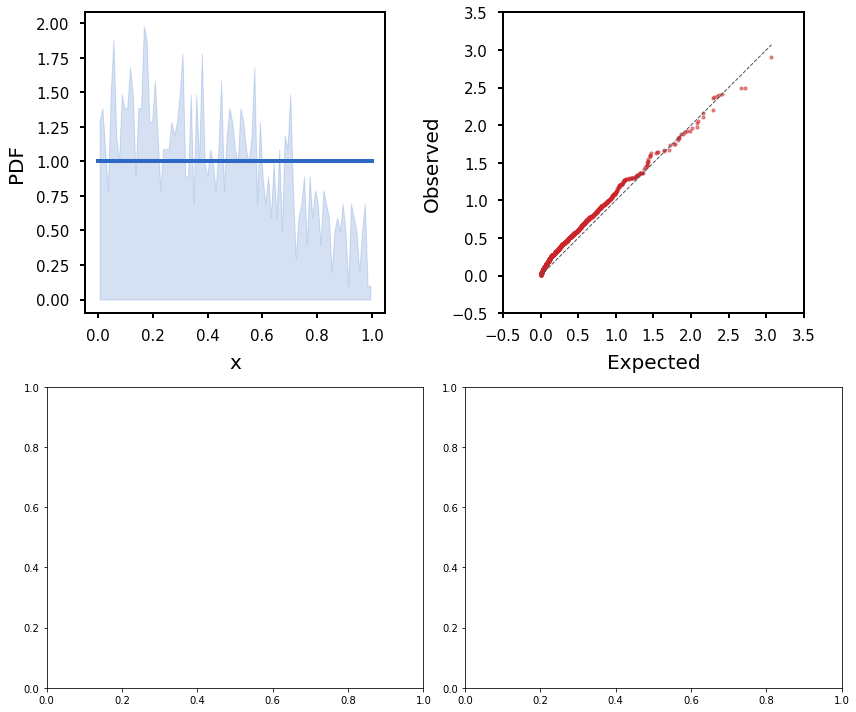

In [15]:
## Plot

fig = plt.figure(figsize = (12, 10))
#plt.suptitle("Binomial simulation / Binomial norm / Qnull new")
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

nbins = 100
sizefactor = 1
#hist_qq.plot(ax1, ax2, Y,     nbins, 'chi2', df = np.mean(df),     loc = 0, scale = 1, size = sizefactor)
#hist_qq.plot(ax3, ax4, Y_maf, nbins, 'chi2', df = np.mean(df_maf), loc = 0, scale = 1, size = sizefactor)
hist_qq.plot(ax1, ax2, pvals_ultra,     nbins, 'uniform', loc = 0, scale = 1, size = sizefactor)
#hist_qq.plot(ax3, ax4, pvals_maf, nbins, 'uniform', loc = 0, scale = 1, size = sizefactor)

plt.tight_layout()
plt.show()